In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import koreanize_matplotlib
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

# 무게에 따른 길이를 예측해주는 모델
df=pd.read_csv("../data/fish.csv", usecols=[0,1,2])
perchDF=df[df["Species"]=="Perch"][df.columns[1:]].reset_index(drop=True)

In [45]:
perchDF.describe()

,Weight,Length
count,56.000000,56.000000
mean,382.239286,27.892857
std,347.617717,9.021668
min,5.900000,8.400000
25%,120.000000,21.825000
50%,207.500000,25.300000
75%,692.500000,36.625000
max,1100.000000,44.000000


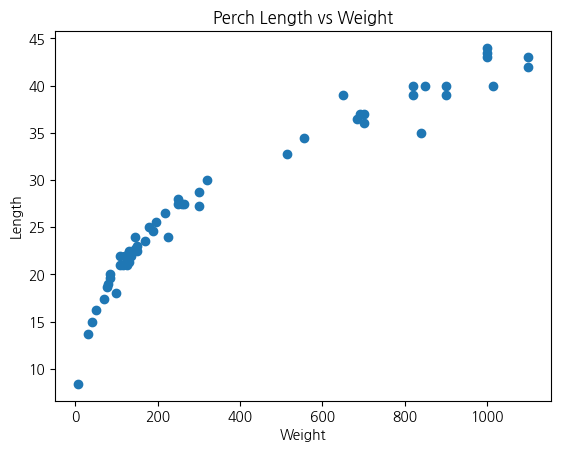

In [46]:
# 데이터 분포, 컬럼 분포, 최빈값, 고유값

plt.scatter(perchDF.Weight, perchDF.Length)
plt.xlabel("Weight")
plt.ylabel("Length")
plt.title("Perch Length vs Weight")
plt.show()


In [47]:
perchDF.corr(numeric_only=True) # 무게에 따른 길이는 비례관계 확인 

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [48]:
model=LinearRegression()
model.fit(perchDF.loc[:,["Weight"]], perchDF.loc[:,["Length"]])

LinearRegression()

In [49]:
model.coef_ # 가중치 계수(x계수)

array([[0.02487985]])

In [50]:
model.intercept_ # 절편 계수(y절편)

array([18.38280291])

In [51]:
perchDF.Weight * model.coef_[0] + model.intercept_[0]

0     18.529594
1     19.178958
2     19.377997
3     19.664115
4     20.124392
5     20.870787
6     20.323431
7     20.373191
8     20.497590
9     20.497590
10    21.119586
11    21.243985
12    21.492784
13    21.617183
14    21.368384
15    21.368384
16    21.617183
17    21.741582
18    21.119586
19    21.617183
20    22.114780
21    21.990380
22    22.114780
23    22.612377
24    23.980768
25    21.990380
26    23.060214
27    22.861175
28    23.284132
29    23.806609
30    25.846756
31    24.851563
32    24.975962
33    24.602764
34    24.602764
35    25.846756
36    26.344353
37    31.171043
38    32.215997
39    39.281873
40    35.425497
41    35.798695
42    35.798695
43    35.549896
44    40.774664
45    34.554702
46    38.784276
47    39.530671
48    40.774664
49    43.635846
50    38.784276
51    45.750633
52    43.262648
53    45.750633
54    43.262648
55    43.262648
Name: Weight, dtype: float64

In [52]:
model.score(perchDF[["Weight"]], perchDF[["Length"]])

0.919021073244782

In [53]:
y_pre=model.predict(perchDF[["Weight"]])
y_pre # 예측값

array([[18.529594  ],
       [19.17895796],
       [19.37799672],
       [19.66411494],
       [20.12439207],
       [20.87078743],
       [20.32343083],
       [20.37319052],
       [20.49758975],
       [20.49758975],
       [21.11958588],
       [21.2439851 ],
       [21.49278355],
       [21.61718278],
       [21.36838433],
       [21.36838433],
       [21.61718278],
       [21.74158201],
       [21.11958588],
       [21.61718278],
       [22.11477968],
       [21.99038046],
       [22.11477968],
       [22.61237658],
       [23.98076807],
       [21.99038046],
       [23.0602138 ],
       [22.86117504],
       [23.2841324 ],
       [23.80660915],
       [25.84675645],
       [24.85156265],
       [24.97596187],
       [24.60276419],
       [24.60276419],
       [25.84675645],
       [26.34435335],
       [31.17104331],
       [32.2159968 ],
       [39.28187282],
       [35.42549682],
       [35.7986945 ],
       [35.7986945 ],
       [35.54989605],
       [40.77466353],
       [34

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# 결정계수 : 1.0 에 가까울수록 좋음
# 오차평균 : 낮을수록 좋음
# s
print(r2_score(perchDF["Length"], y_pre)) # r2_score
print(mean_squared_error(perchDF["Length"], y_pre, squared=False)) # 평균제곱오차 squared=False : RMSE, True : MSE 
print(mean_absolute_error(perchDF["Length"], y_pre)) # 평균 절댓값 오차

0.919021073244782
2.544252327280468
1.851505000314426


In [58]:
print(mean_absolute_error(perchDF["Length"], y_pre)) # 평균 절댓값 오차

1.851505000314426
1.3.0
